## California Housing Datensatz 

### Datensatz und Tools laden

In [1]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True).frame #gibt einen panda datenframe zurück
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

## Aufgabe 5: Interaktionseffekte California Housing

In [84]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_interaktionseffekte = df.copy()
df_interaktionseffekte["MedInc_AveRooms"] = df['MedInc'] * df["AveRooms"]

y = df_interaktionseffekte["MedHouseVal"]
features = ["AveOccup", "AveRooms", "MedInc", "MedInc_AveRooms"]

scaled_values = scaler.fit_transform(df_interaktionseffekte[features])
x = pd.DataFrame(scaled_values, columns=features)

# intercept hinzufügen
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     4810.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:18:32   Log-Likelihood:                -25443.
No. Observations:               20640   AIC:                         5.090e+04
Df Residuals:                   20635   BIC:                         5.094e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0686      0.006    3

Modellanalyse:
- Bei AveRooms ist der p-Wert nicht mehr signifikant
- Interaktionseffekt ist Signifikant und kann verwendet werden
- Man hat eine signifikante Verbesserung des Modells im Vergleich zum Basismodell (Aufgabe 1), die aber nicht stark ist
    - R^2 ist nur gering erhöht
- Eine Erhöhung von MedInc_AveRooms führt zu einer Verminderung des Hauswertes

## Polynomial California Housing

In [85]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_polinomial = df.copy()
df_polinomial["MedInc2"] = df_polinomial["MedInc"] ** 2

features = ["MedInc", "MedInc2", "AveRooms","AveOccup"]
scaled_values = scaler.fit_transform(df_polinomial[features])
x = pd.DataFrame(scaled_values, columns=features)
y = df_polinomial["MedHouseVal"]

# intercept hinzufügen
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     4874.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:22:23   Log-Likelihood:                -25378.
No. Observations:               20640   AIC:                         5.077e+04
Df Residuals:                   20635   BIC:                         5.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0686      0.006    359.103      0.0

Modellvergleich:
- Das Polynomielle Modell ist signifikant besser als das einfache lineare Modell
- Das Polynomielle Modell zeigt, dass wenn der Mediane Income sehr groß ist, dass dann der Häuserwert nicht mehr so wichtig ist

## Aufgabe 7: Steepwise Regression California Housing

### Vorwärtsselektion

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

all_features = df.copy()
y = all_features["MedHouseVal"]
x_all = all_features[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]

lr = LinearRegression()
selector = SequentialFeatureSelector(lr, n_features_to_select='auto', direction="forward", scoring="r2", cv=5)
selector.fit(X=x_all, y=y)

features_mask = selector.get_support()
x_selected = all_features[x_all.columns[features_mask].to_list()]

# intercept hinzufügen
x_selected = sm.add_constant(x_selected)

model = sm.OLS(y, x_selected)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     5995.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:42:59   Log-Likelihood:                -24284.
No. Observations:               20640   AIC:                         4.858e+04
Df Residuals:                   20635   BIC:                         4.862e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3958      0.025    -16.012      0.0

### Rückwärtsselektion

In [39]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

all_features = df.copy()
y = all_features["MedHouseVal"]
x_all = all_features[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]

lr = LinearRegression()
selector = SequentialFeatureSelector(lr, n_features_to_select='auto', direction="backward", scoring="r2", cv=5)
selector.fit(X=x_all, y=y)

features_mask = selector.get_support()
x_selected = all_features[x_all.columns[features_mask].to_list()]

# intercept hinzufügen
x_selected = sm.add_constant(x_selected)

model = sm.OLS(y, x_selected)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     7548.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:43:05   Log-Likelihood:                -22939.
No. Observations:               20640   AIC:                         4.589e+04
Df Residuals:                   20635   BIC:                         4.593e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.8508      0.638    -59.307      0.0

### Modell mit allen Prädiktoren

In [87]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

all_features = df.copy()
y = all_features["MedHouseVal"]
x = all_features[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]

# intercept hinzufügen
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:30:40   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

## Aufgabe 8: QQ-Plot California Housing

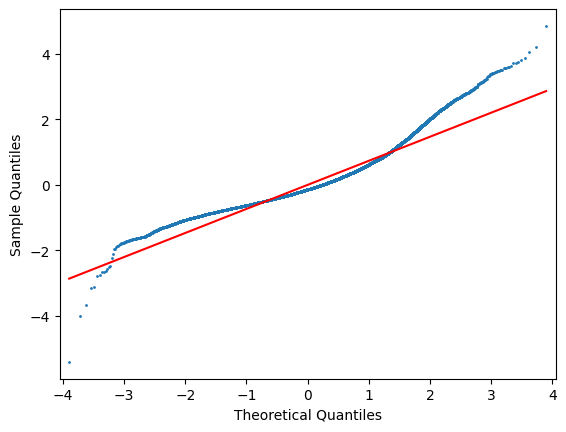

In [82]:
from matplotlib import pyplot as plt
import statsmodels.api as sm

features = df.copy()
y = features["MedHouseVal"]
x = features[["MedInc", "HouseAge", "Latitude", "Longitude"]]

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

residuals = model.resid
fig = sm.qqplot(residuals, line="s", markersize=1) #markersize wird angegeben, um die einzelnen punkte des plots feiner darzustellen
plt.show()

Interpretation:
- Man erkennt, dass der QQ-Plot kurven bzw. Abweichungen von der Geraden enhält. Die Residuen sind somit nicht perfekt normalverteilt.
    - Es muss an der Robustheit des Modells gearbeitet werden (abhängige Variable transformieren?)

## Aufgabe 9: Variance Inflation Factors (VIF)

In [83]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = ["MedInc", "HouseAge", "Latitude", "Longitude"]

# standardisierung, weil vif sonst zu hoch wird
scaled_values = scaler.fit_transform(df[features])
df_vif = pd.DataFrame(scaled_values, columns=features)

for i in range(len(df_vif.columns)):
    vif_feature = variance_inflation_factor(df_vif, i)
    print("Feature "+x_all.columns[i]+": "+str(vif_feature))

Feature MedInc: 1.1049342764656542
Feature HouseAge: 1.1111049569634253
Feature Latitude: 7.944299037142075
Feature Longitude: 7.993635263588759


Diskussion:
- Latitude und Longitude haben hohe VIF Werte. Diese sollte man vermindern bzw. entfernen. Eine Möglichkeit wäre, dass man die Longitude und Latitude Features durch ein Fixpunkt Feature austauscht